Importing libraries and dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("uber.csv")

This data contains data about date and time, latitude and longitude, and a Base column that contains code affiliated with the uber pickup.

In [7]:
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime)
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [8]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


<ipython-input-9-2282722f9d2a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Day"])


<Axes: xlabel='Day', ylabel='Density'>

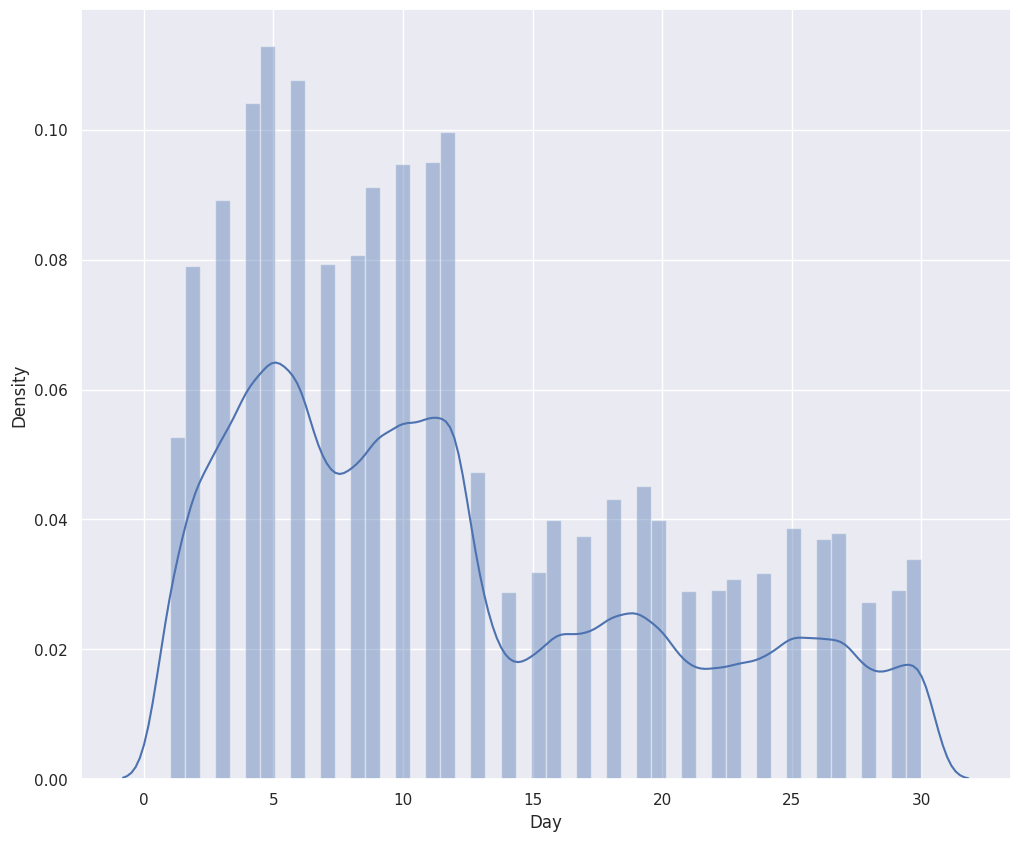

In [9]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])

<ipython-input-10-fe964bdaceca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Hour"])


<Axes: xlabel='Hour', ylabel='Density'>

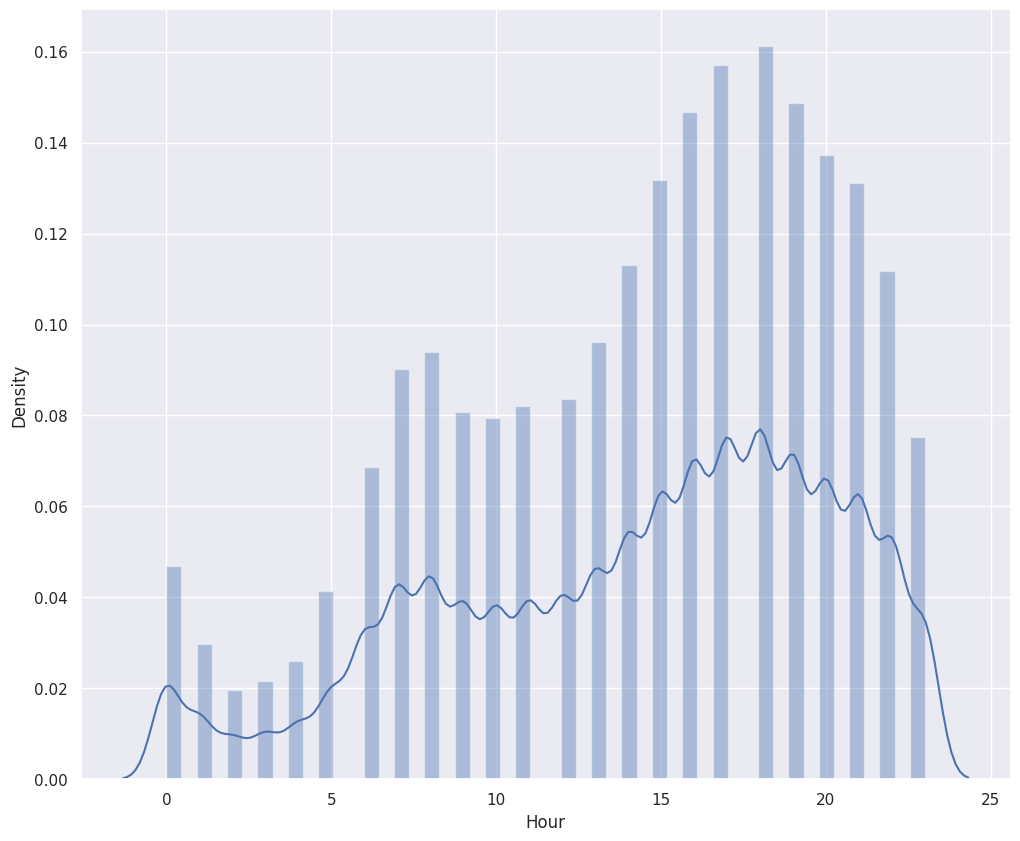

In [10]:
sns.distplot(data["Hour"])

<ipython-input-11-dfc05892656b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Weekday"])


<Axes: xlabel='Weekday', ylabel='Density'>

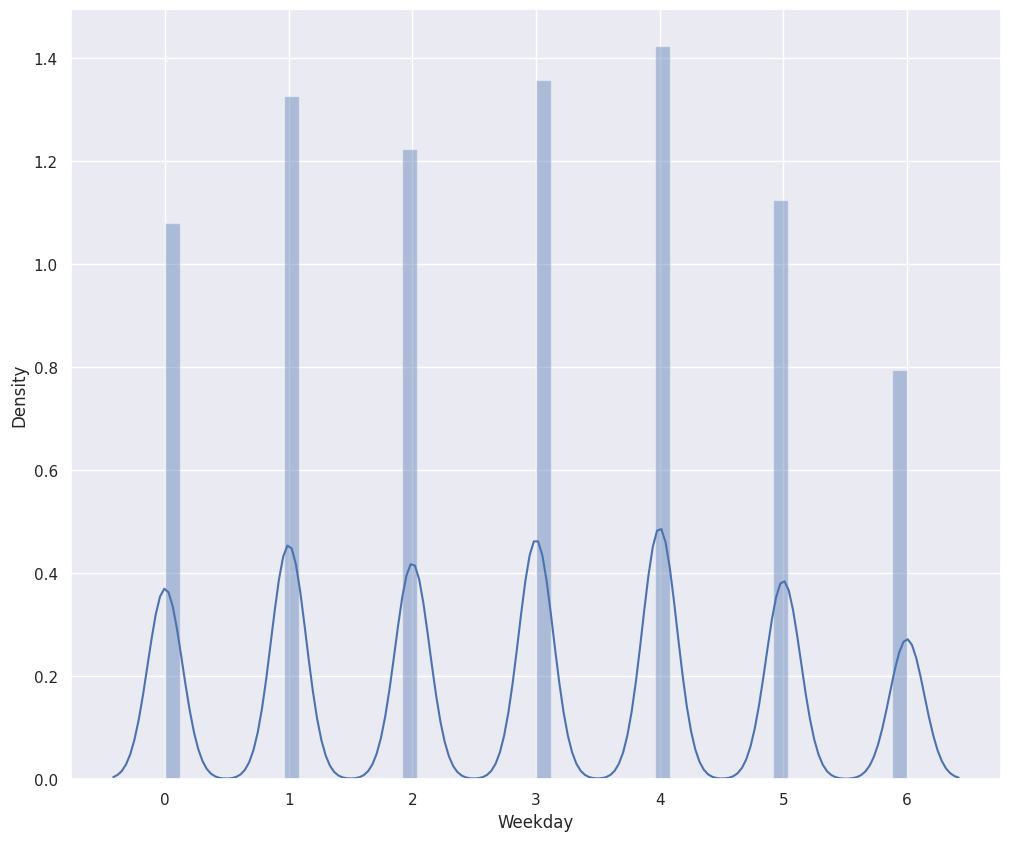

In [11]:
sns.distplot(data["Weekday"])

<Axes: xlabel='Hour', ylabel='Weekday'>

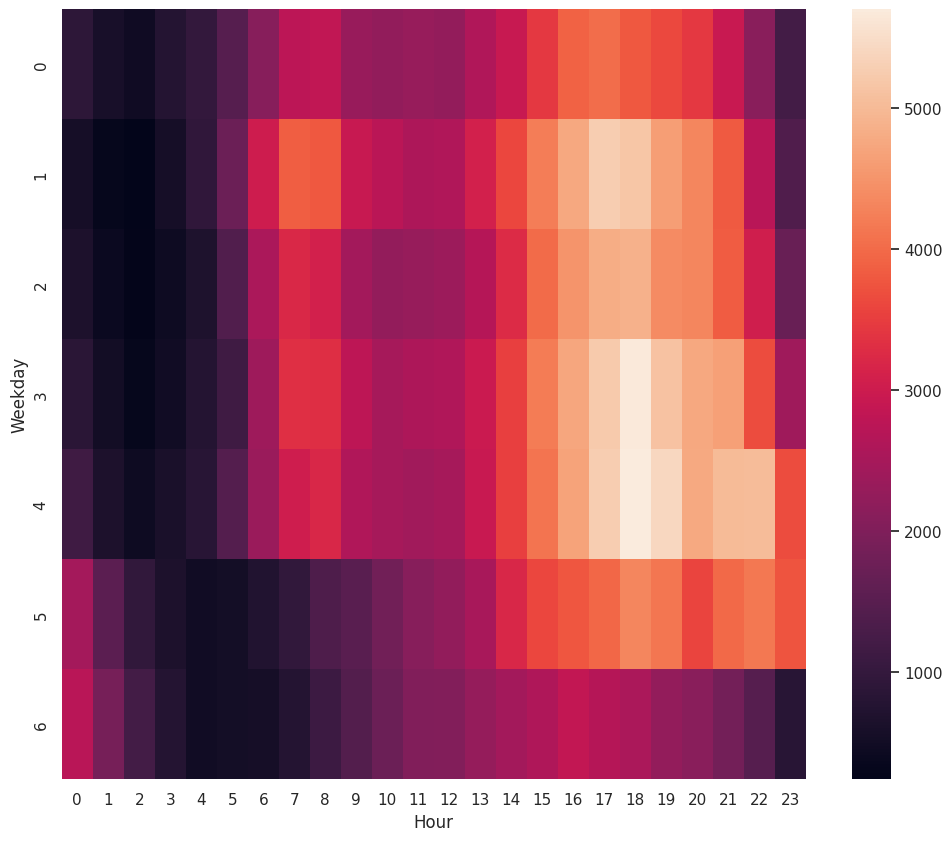

In [12]:
# correlation of weekday and hour

df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


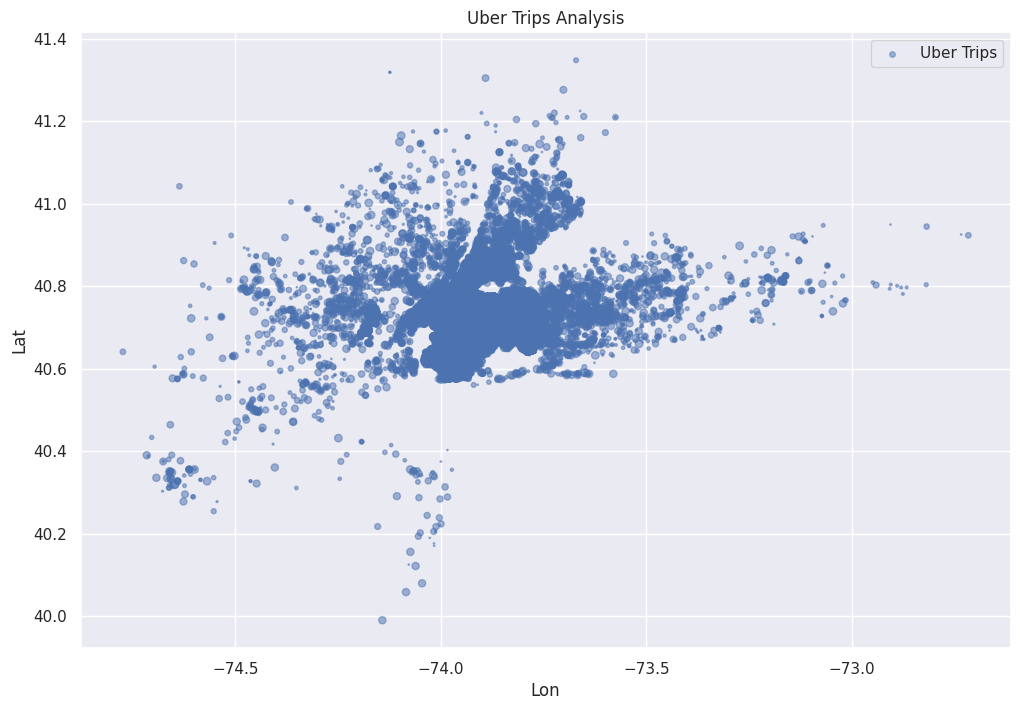

In [20]:
data.plot(kind='scatter', x='Lon',y='Lat', alpha=0.5, s=data["Day"], label='Uber Trips', figsize=(12,8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

Summary

So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are:

  1. Monday is the most profitable day
     for Uber
  2. On Saturdays less number of people
     use Uber
  3. 6 pm is the busiest day for Uber
  4. On average a rise in Uber trips
     start around 5 am.
  5. Most of the Uber trips originate
     near the Manhattan region in New York.